
# _**시간도 돈도 없지만**_

# _**과거에서 미래를 찾고 싶다 !**_




# 6장 확률(Probability)

_**확률 법칙은 일반적으로 보면 굉장히 맞지만, 구체적으로 보면 굉장히 틀리다.** - 에드워드 기본(Edward Gibbon)_   

>$P(E) = {사건\,E\,가\,일어날\,경우의\,수 \over 모든\,경우의\,수}$


## 6.1 독립성과 종속성

### - 독립성

두 사건 A 와 B 에서 한 사건의 결과가 다른 사건에 영향을 주지 않을 때 A 와 B 를 독립사건이라고 한다.

### - 종속성

두 사건 A 와 B 에서 한 사건의 결과가 다른 사건에 영향을 줄 때 A 와 B 를 종속사건이라고 한다.
* A 가 일어나기 전과 후에 B 의 확률이 달라지면 종속사건이다.


## 6.2 조건부 확률

두 사건 A 와 B 가 동시에 일어날 확률은 다음과 같다.

>$P(A, B) = P(A \cap B)$

두 사건 A 와 B 가 독립사건이라면 A 와 B 가 동시에 일어날 확률은 다음과 같다.

>$P(A, B) = P(A)P(B)$


두 사건 A 와 B 가 독립사건이라면 조건부 확률은 아래와 같다.

>$P(A\,after\,B) = P(A|B) = {P(A \cap B) \over P(B)} = {P(A)P(B) \over P(B)} = P(A)$

두 사건 A 와 B 가 종속사건이라면 조건부 확률은 아래와 같다.

>$P(A|B) \neq P(A)$


<div>
    <div style="width: 70%">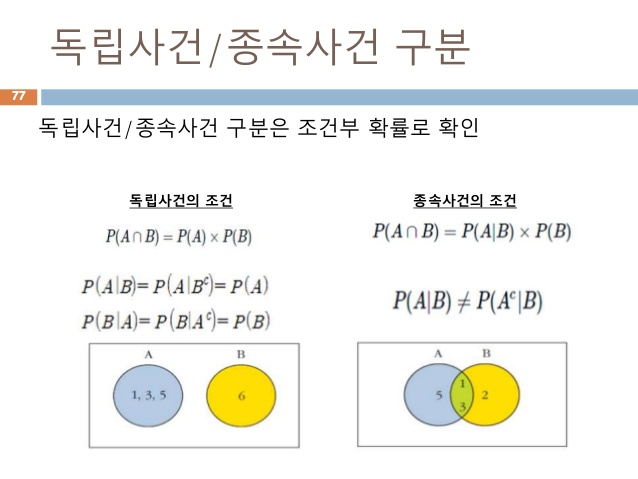</div>
    <div style="width: 40%; float: right;" />
</div>

In [4]:
import random

def random_kid():
    return random.choice(["boy", "girl"])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

print("P(older):", older_girl / 10000)
print("P(either):", either_girl / 10000)
print("P(both | older):", both_girls / older_girl)      # 0.514 ~ 1/2
print("P(both | either): ", both_girls / either_girl)  # 0.342 ~ 1/3

P(older): 0.4937
P(either): 0.7464
P(both | older): 0.5007089325501317
P(both | either):  0.3311897106109325



## 6.3 베이즈 정리

**_베이즈 정리(Bayes's Theorem)_** 는 조건부 확률을 반대로 뒤집은 것이다.

- _**어떤 대상에 대한 믿음을 객관적이고도 새로운정보로 업데이트할 때 보다 개선된 새로운 믿음을 가질 수 있다.** - 토머스 베이즈_

- 1740년대 영국 목사이자 수학자 토머스 베이즈가 생각해낸 이론으로 이전의 경험과 현재의 증거를 토대로 사건의 확률을 추론하는 알고리즘


>$P(A|B) = {P(A,B) \over P(B)} = {P(B|A)P(A) \over P(B)}$

- 베이즈 정리의 Hello World!!

> 암에 걸릴 확률은 1%이고, 암 검사가 정확히 암을 양성이라고 진단할 확률은 90%라고 하자.

> 만약 어떤 사람이 암 검사 결과에서 양성 반응이 나타났을때, 실제로 이 사람이 암에 걸렸을 확률은 얼마일까?

> $P(A)$: 암에 걸렸을 확률 = $0.01$

> $P(A')$: 암에 걸리지 않았을 확률 = $0.99$

> $P(B)$: 검사 결과가 양성일 확률 = $P(B|A)P(A) + P(B|A')P(A')$

> $P(B|A)$: 암에 걸렸는데 양성일 확률 = $0.9$

> $P(B|A')$: 암에 걸리지 않았는데 양성일 확률 = $0.1$

> $P(A|B)$: $P(B|A)P(A) / P(B)$ = $0.9 * 0.01 / (0.9 * 0.01 + 0.1 * 0.99) = 0.0833$

- 다시 풀어서 설명하면!!

> 1000명의 사람 중 진짜 암환자는 10명이다.

> 10명 중 90%가 양성 판정을 받으므로, 진짜 암환자 중 9명은 양성 판정을, 나머지 한 명은 음성 판정을 받는다.

> 암에 걸리지 않은 사람은 990명이다. 그런데 암에 걸리지 않았더라도 기계가 오진할 확률이 10%이기 때문에 99명은 양성 반응이 나올 수 있다.

> 따라서, 양성 판정을 받는 사람은 9 + 99 = 108명이 된다.

> 결국 108명의 양성 판정을 받은 사람 중에 실제로 암환자인 사람은 9명이므로 9 / 108 = 0.0833 즉 8.3%가 된다.

- 그렇다면 우리는...

> 데이터 분석을 통해 해당시간에 가격이 0.4% 오를 가능성이 50%이고 0.6% 오를 가능성이 50% 임을 발견했다. 

> 또 다른 데이터 관측을 통해 3시간 연속 올랐을때 0.6% 일 가능성은? (단, 각 시간의 상승과 하락은 독립적이라고 가정한다.)

> $$P(A = 0.6|B) = {{P(B|A = 0.6)P(A = 0.6)} \over {P(B|A = 0.6)P(A = 0.6) + P(A|B = 0.4)P(A = 0.4)}} = {{(0.6)^3(0.5)} \over {(0.6)^3(0.5) + (0.4)^3(0.5)}} = {{(0.6)^3} \over {(0.6)^3 + (0.4)^3}} = {0.2160 \over {0.2160 + 0.0640}} = 0.7714$$


## 6.4 확률변수

**_확률변수(Random Variable)_** 란 특정 확률분포와 연관되어 있는 변수를 의미한다.

## 6.5 연속 분포


### 6.5.1 이산확률
동전 던지기는 각각의 결과에 확률을 계산해 주는 **_이산형 분포(Discrete Distribution)_** 를 따른다.

- 확률분포표(동전 2개 던지기)

<div>
    <div style="width: 50%;">
        <table style="width:100%;">
            <tr style="border-bottom: 1px solid #cfcfcf;">
                <th>$$X$$</th>
                <th>$$0$$</th>
                <th>$$1$$</th>
                <th>$$2$$</th>
                <th>$$합계$$</th>
            </tr>
            <tr>
                <td>$$P(X=x)$$</td>
                <td>$$1 \over 4$$</td>
                <td>$$2 \over 4$$</td>
                <td>$$1 \over 4$$</td>
                <td>$$1$$</td>
            </tr>
        </table>
    </div>
    <div style="width: 50%; float: right;" />
</div>

- $X$       : 확률변수
- $P(X=x)$  : 확률질량함수(Probability Mass Function, PMF)

### 6.5.2 연속확률

대부분의 경우, **_연속적인 결과_** 에 대한 분포를 사용해서 모델을 만든다.

**_확률밀도함수(Probability Density Function, PDF)_** 는 특정구간에서 적분한 값이다.

연속 분포의 가장 간단한 유형은 **_균등분포(Uniform Distribution)_** 는 0 과 1 사이의 모든 값에 동등한 비중을 준 분포이다.

>$f(x)=\dfrac{1}{b-a}$

- 균등분포의 확률밀도함수
<div>
    <div style="width: 30%">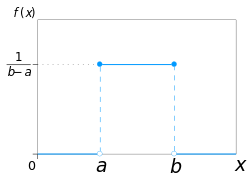</div>
    <div style="width: 70%; float: right;" />
</div>

- 균등분포의 누적분포함수
<div>
    <div style="width: 30%">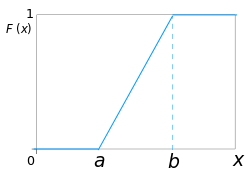</div>
    <div style="width: 70; float: right;" />
</div>

In [7]:
import random

# random 함수도 균등 분포를 따르는 일종의 확률변수이다.
print (random.random())

0.2544134783005273


In [9]:
# 균등분포의 확률밀도함수
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0    # P(0 <= X < 1)

# 균등분포의 누적분포함수
def uniform_cdf(x):
    "균등분포를 따르는 확률변수의 값이 x보다 작거나 같을 확률을 반환"
    if x < 0: return 0          # 균등분포의 확률은 절대로 0보다 작을 수 없음
    elif x < 1: return x        # 예시: P(X <= 0.4) = 0.4
    else: return 1              # 균등분포의 확률은 항상 1보다 작음
    
print (uniform_pdf(0.3))
print (uniform_cdf(0.3))

1
0.3



## 6.6 정규분포

### 6.6.1 정규분포란?

정규분포는 가우스(Gauss, 1777-1855)에 의해 제시된 분포로서 일명 가우스분포(Gauss Distribution)라고 불리며 물리학 실험 등에서 오차에 대한 확률분포를 연구하는 과정에서 발견되었다고 한다. 가우스 이후 이 분포는 여러 학문 분야에서 이용되었으며, 초기의 통계학자들은 모든 자료의 히스토그램이 정규분포의 형태와 유사하지 않으면 비정상적인 자료라고까지 생각했다고 한다. 이러한 이유로 이 분포에 ‘정규(normal)’라는 이름이 붙게 된 것이다.

- 연속 분포의 하나다.
- 평균에 가까워질수록 값이 커진다.
- 평균을 중심으로 대칭이다.
- 전체면적은 1이다.
- 정규분포의 확률밀도함수(공식유도 --> https://wikidocs.net/4040)
    
    $\mu$: 평균, $\sigma$: 표준편차
>$f(x)=\dfrac{1}{\sigma \sqrt{2\pi}} \text{exp}\left\{-\dfrac{1}{2} \left(\dfrac{x-\mu}{\sigma}\right)^2\right\}$


In [11]:
import math

# 정규분포의 밀도함수
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

print(normal_pdf(2))
print(normal_pdf(0))

0.05399096651318806
0.3989422804014327


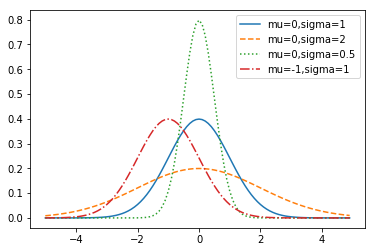

In [12]:
import matplotlib.pyplot as plt

def plot_normal_pdfs(plt):
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
    plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_pdf(x,mu=-1)   for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend()
    plt.show()

plot_normal_pdfs(plt)

_**표준정규분포(Standard Normal Distribution)**_ 는 $\mu=0$ 이고 $\sigma=1$ 인 정규분포를 의미한다.


In [14]:
# 정규분포의 누적분포함수
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

print(normal_cdf(1))

0.841344746068543


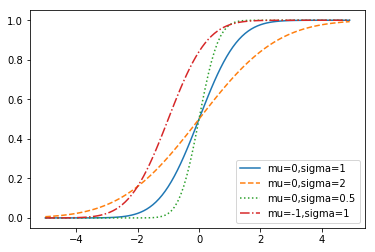

In [15]:
def plot_normal_cdfs():
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
    plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend(loc=4) # bottom right
    plt.show()
    
plot_normal_cdfs()

- 표준정규분포표
<div>
    <div style="width: 70%">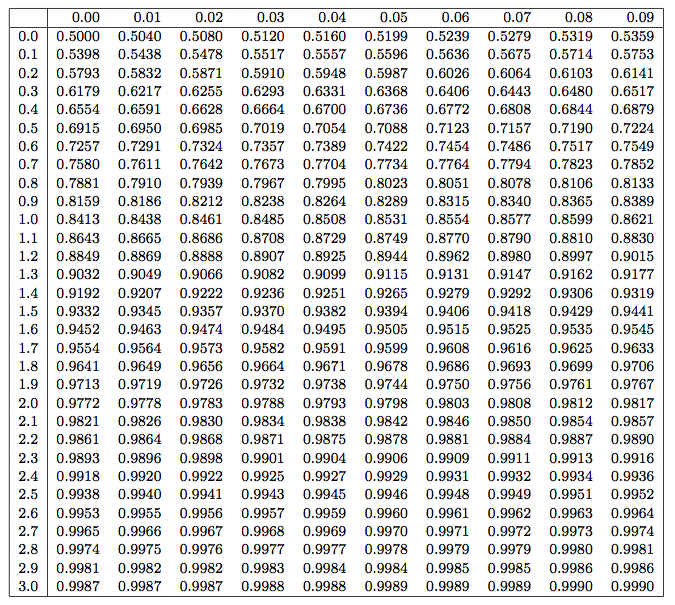
    </div>
    <div style="width: 30%; float: right;" />
</div>

_**특정 확률을 갖는 확률변수**_ 의 값을 찾기 위해, normal_cdf의 역함수가 필요할 수도 있다.
- 누적분포함수의 역함수를 쉽게 계산해내는 방법은 없다.
- 연속 및 증가 함수라는 점을 고려하면 이진 검색을 이용한다.

In [17]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """이진 검색을 사용해서 역함수를 근사"""

    # 표준정규분포가 아니라면 표준정규분포로 변환
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z, low_p = -10.0, 0            # normal_cdf(-10)는 0에 근접
    hi_z,  hi_p  =  10.0, 1            # normal_cdf(10)는 1에 근접
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # 중간 값
        mid_p = normal_cdf(mid_z)      # 중간 값의 누적분포 값을 계산
        if mid_p < p:
            # 중간 값이 너무 작다면 더 큰 값들을 검색
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # 중간 값이 너무 크다면 더 작은 값들을 검색
            hi_z, hi_p = mid_z, mid_p
        else:
            break

    return mid_z

print (inverse_normal_cdf(0.3))

-0.5243968963623047


## 6.7 중심극한정리

### 6.7.1 중심극한정리
**_중심극한정리(Central Limit Theorem, CLT)_** 란 동일한 분포에 대한 독립적인 확률변수의 평균을 나타내는 확률변수가 대략적으로 정규분포를 따른다는 정리이다.

- $n$ 이 커질수록 평균이 가운데로 몰린다.
- 표본 크기가 충분히 크면 평균의 분포가 근사적으로 정규 분포를 따른다.
- 표본이 커질수록 평균이 0이고 표준편차가 1인 정규분포와 비슷해질 것이다.

>$\dfrac{\sum\limits_{i=1}^n X_i - n\mu}{\sqrt{n}\sigma}$

중심극한정리를 쉽게 이해하기 위해 이항확률변수를 예를 들어 설명해 볼까한다!!!

### 6.7.2 베르누이 시행

**_베르누이 시행(Bernoulli Trial)_** 은 이산확률분포로 2가지 상황만 나오는 경우에 사용한다.
- 동전을 던졌을때 앞면 아니면 뒷면이 나올 경우
- 제품을 만들었는데 양품 또는 불량품이 나올 경우
- 시험을 쳤을때 합격 또는 불합격할 경우

In [18]:
# 베르누이 시행
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

print(bernoulli_trial(0.5))

1


### 6.7.3 이항분포

**_이항분포(Bimodal distribution)_** 는 연속된 $n$번의 독립적 시행에서 각 시행이 확률 $p$를 가질 때의 이산 확률 분포를 말한다.

In [19]:
# 이항 확률변수
def binomial(p, n):
    return sum(bernoulli_trial(p) for _ in range(n))

print(binomial(0.5, 10))

5


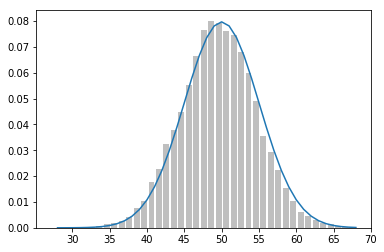

In [24]:
from collections import Counter

def make_hist(p, n, num_points):
    
    data = [binomial(p, n) for _ in range(num_points)]
    
    # 이항분포의 표본을 막대 그래프로 표현
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    
    # 근사된 정규분포를 라인 차트로 표현
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) 
          for i in xs]
    plt.plot(xs, ys)
    plt.show()

make_hist(0.5, 100, 10000)


## 6.8 더 공부해 보고 싶다면

### 6.8.1 scipy.stats

- 유명한 확률분포의 확률밀도함수와 누적분포함수를 구현해놓음

    http://docs.scipy.org/doc/scipy/reference/stats.html

### 6.8.2 Introduction to Probability

- 확률론 교과서 하나쯤 보는 것을 추천한다고 한다. 온라인에서 구할 수 있는 가장 좋은 교과서라고 하는데...
    
    http://www.dartmouth.ded/~chance/teaching_aids/books_articles/probability_book/amsbook.mac.pdf